# Multiple Linear Regression

## Bilke sharing assignment

## Step 1: Reading and Understanding the Data


In [190]:
import warnings
warnings.filterwarnings('ignore')

In [191]:
import numpy as np
import pandas as pd

In [192]:
bike = pd.read_csv('data/bike.csv')

In [193]:
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [194]:
bike.shape

(730, 16)

###### drop unused column

In [195]:
bike.drop(['dteday', 'instant'], axis = 1, inplace = True)

From 
   - casual: count of casual users
   - registered: count of registered users
   
 It duplicate with cnt

In [196]:
bike.drop(['casual', 'registered'], axis = 1, inplace = True)

In [197]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [198]:
bike.shape

(730, 12)

In [199]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [200]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

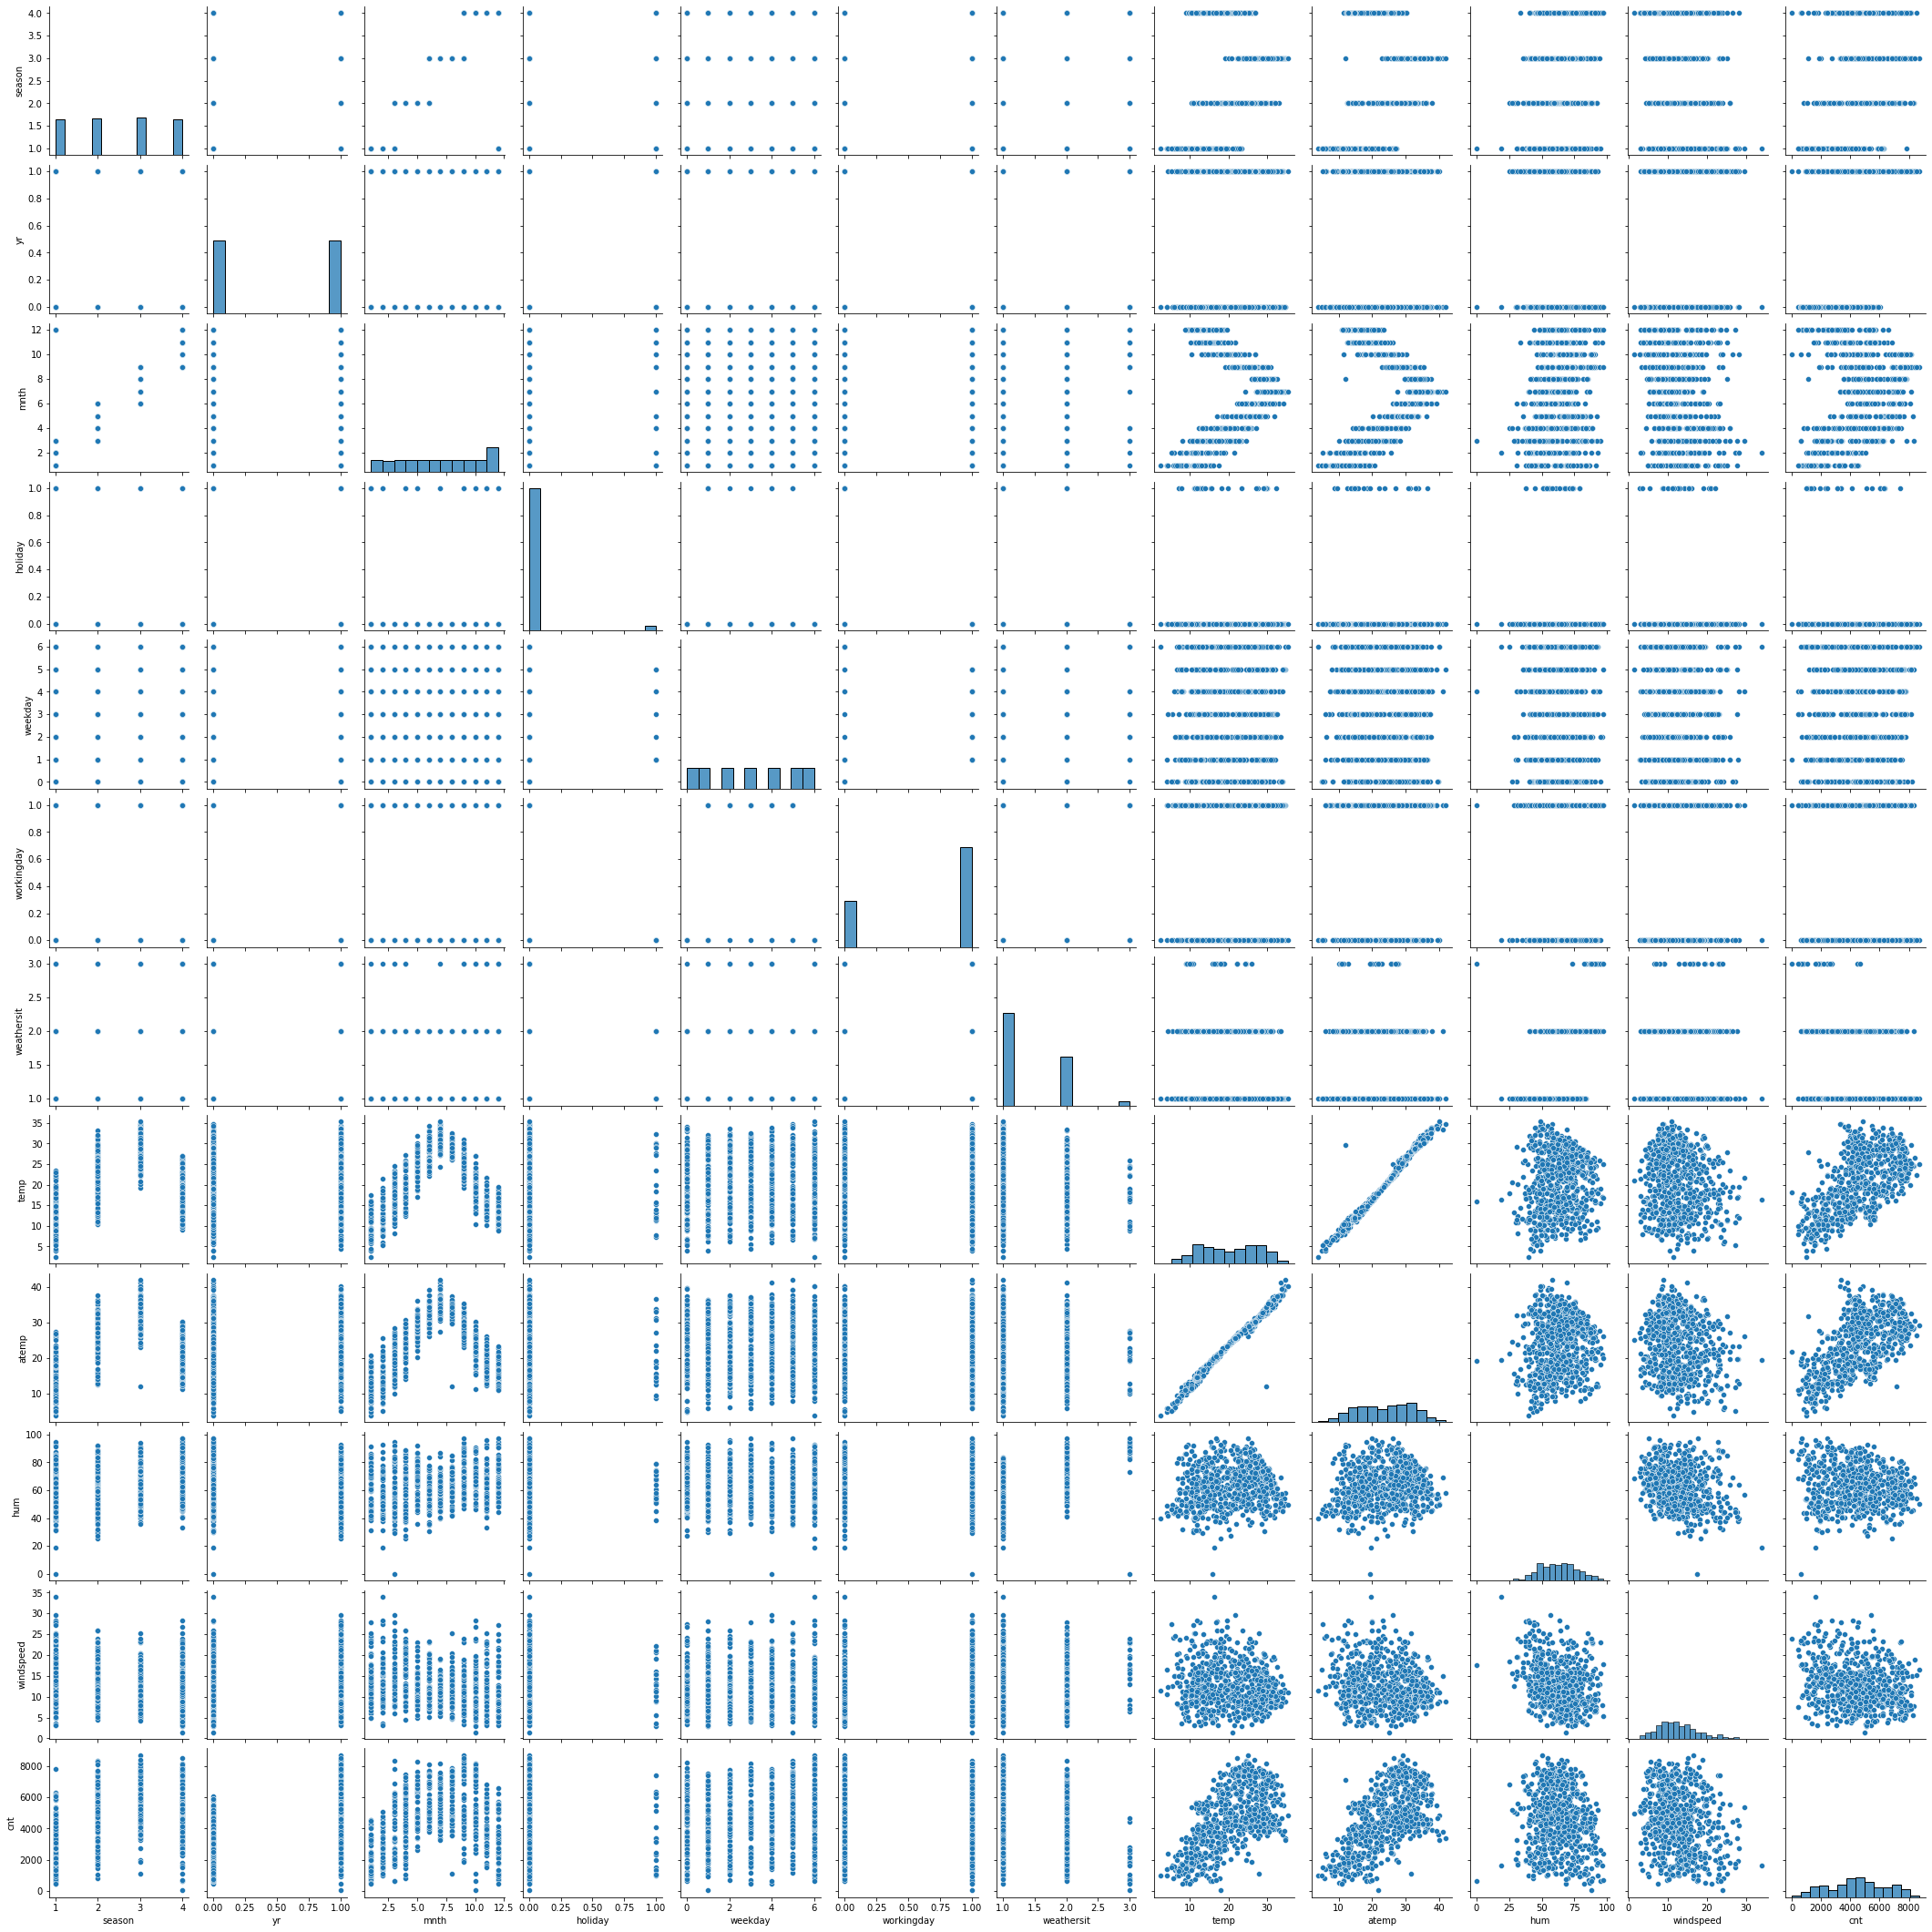

In [202]:
sns.pairplot(bike)
plt.show()

## Step 3: Data Preparation

In [203]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [204]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [205]:
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike['weathersit'].replace({1:"Good",2:"Monday",3:"Average",4:"Bad"},inplace=True)
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Monday,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Monday,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


Visualising categorical Variables to understand data better


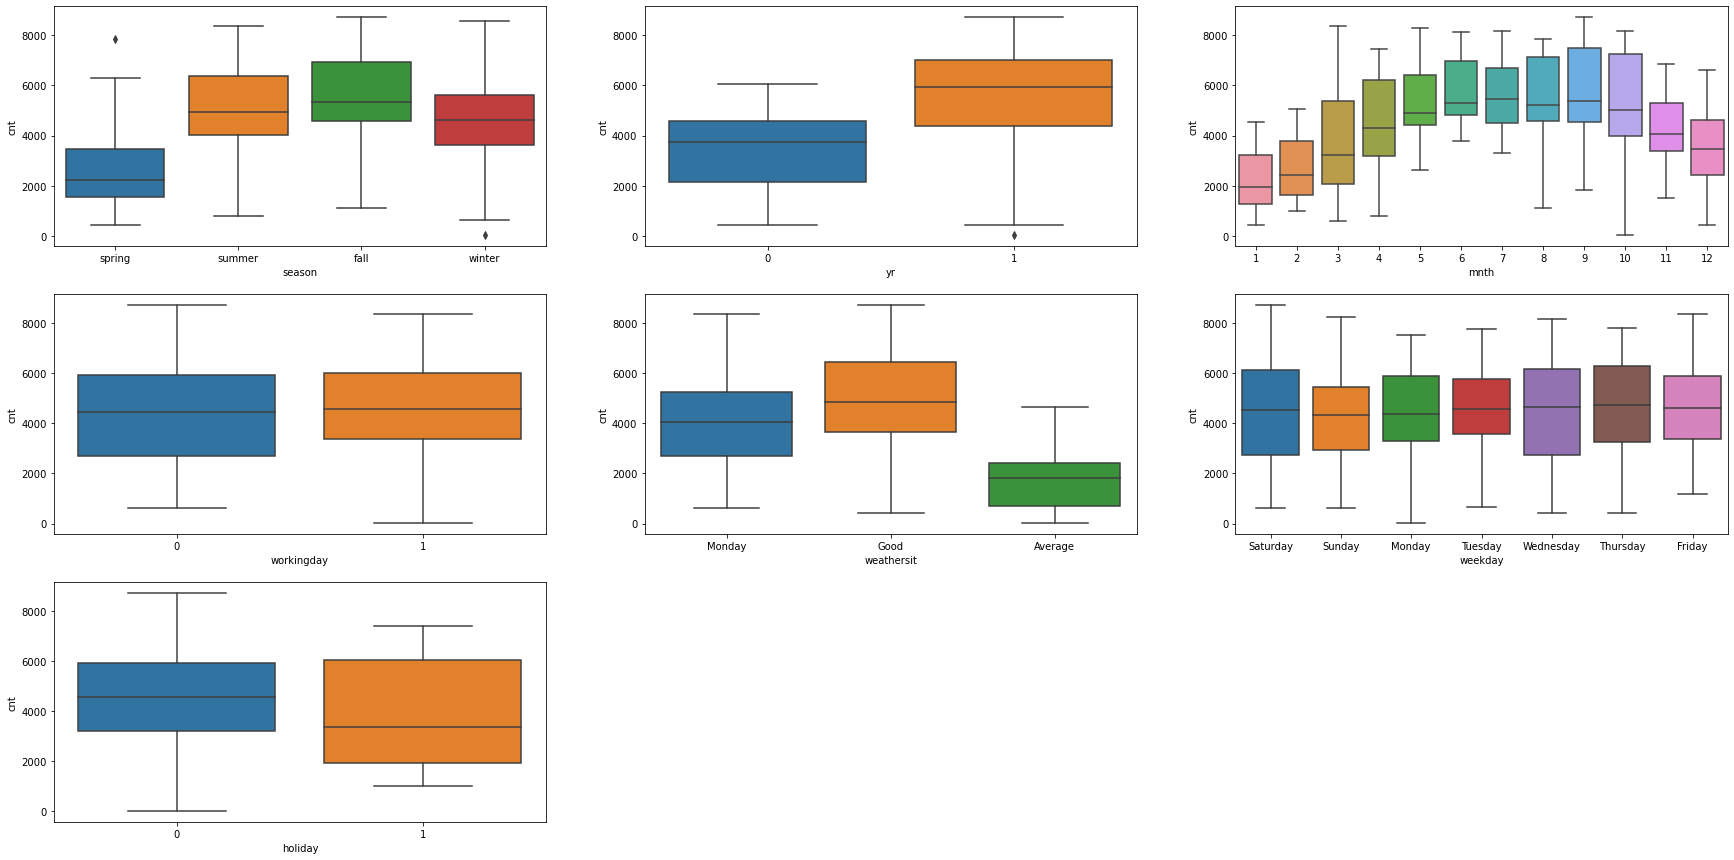

In [206]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

In [207]:
dummy = pd.get_dummies(bike[['season','weekday','weathersit']], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good,weathersit_Monday
0,1,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,1,1,0


In [208]:
bike = pd.concat([bike,dummy], axis=1)   #Axis=1 is for horizontal stacking
bike = bike.drop(['season','weekday','weathersit'], axis=1)
bike.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good,weathersit_Monday
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,1
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,1,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,1,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,1,0


## Step 4: Splitting the Data into Training and Testing Sets

In [209]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)
df_test

(510, 20)
(219, 20)


,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good,weathersit_Monday
184,0,7,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,1,0,0,0,0,0,0,1
535,1,6,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,1,0
299,0,10,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,1,0,0,0,1
221,0,8,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,1,1,0
152,0,6,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,2,0,0,10.899153,13.22605,68.7917,11.791732,2947,1,0,0,0,0,1,0,0,0,0,1
702,1,12,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,0,0,0,0,1,0,1,0
127,0,5,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,0,0,0,1,0,0,0,1,0
640,1,10,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,1,0,1


### Rescaling the Features 
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
scaler = MinMaxScaler()

In [215]:

# We do a MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

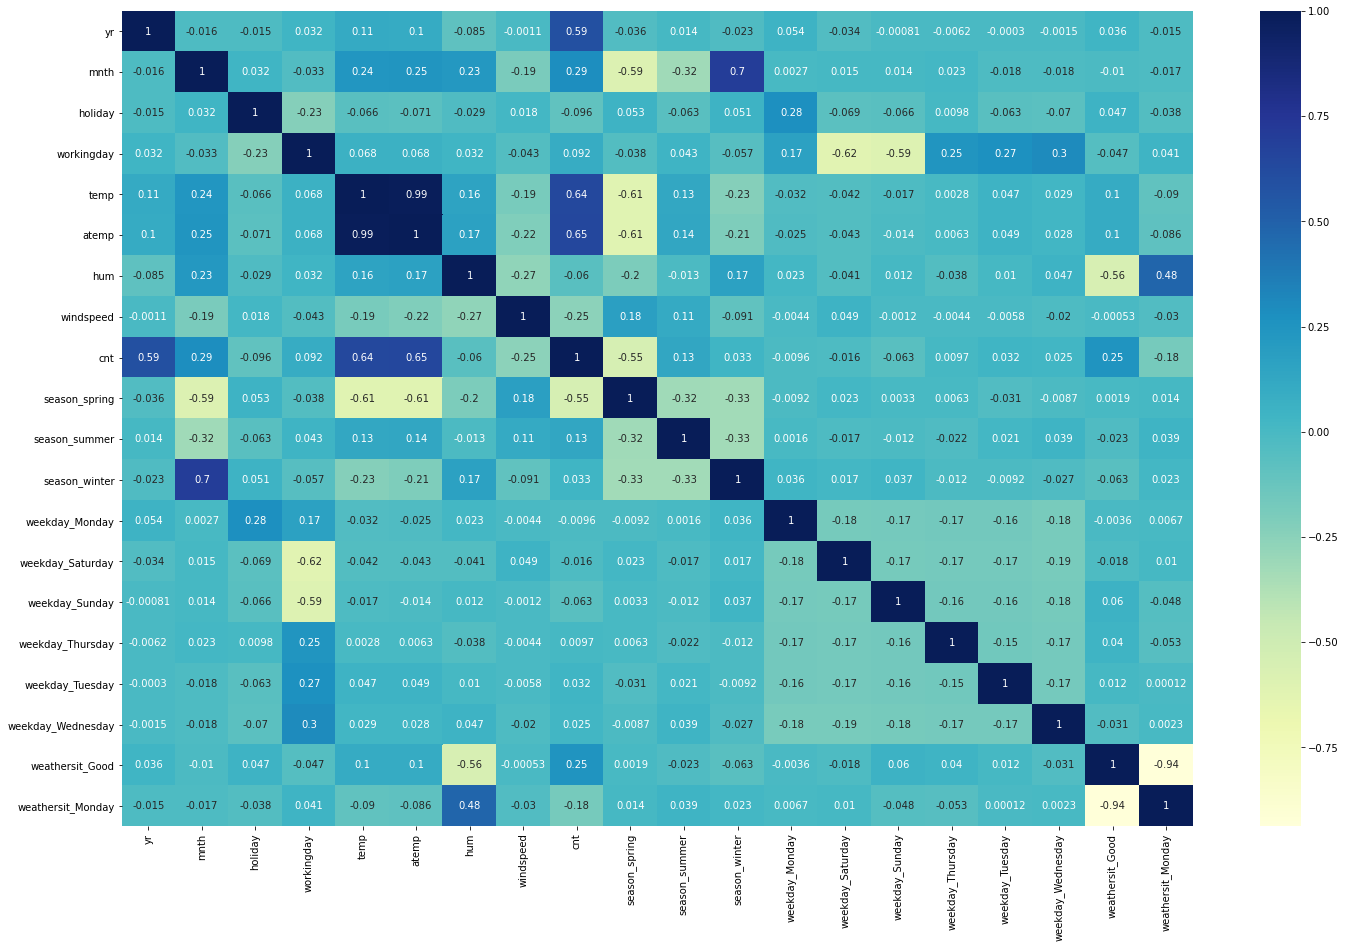

In [217]:

# Checking the Heatmap
plt.figure(figsize=(24,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

## Step 5: Building a linear model


In [219]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.3
Date:                Wed, 26 May 2021   Prob (F-statistic):          2.22e-178
Time:                        08:25:13   Log-Likelihood:                 496.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     491   BIC:                            -875.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0069      0.041      0.170      0.865      -0.073       0.087
yr                    0.2320      0.008     27.579      0.000       0.215       0.248
mnth                  0.0131      0.026      0.507      0.612      -0.038       0.064
holiday              -0.0473      0.025     -1.863      0.063      -0.097       0.003
workingday            0.0376      0.014      2.774      0.006       0.011       0.064
temp                  0.4395      0.140      3.141      0.002       0.165       0.714
atemp                 0.0559      0.143      0.391      0.696      -0.225       0.337
hum                  -0.1269      0.039     -3.246      0.001      -0.204      -0.050
windspeed            -0.1784      0.027     -6.578      0.000      -0.232      -0.125
season_spring        -0.0702      0.023     -3.031      0.003      -0.116      -0.025
season_summer         0.0453      0.016      2.880      0.004       0.014       0.076
season_winter         0.0850      0.019      4.550      0.000       0.048       0.122
weekday_Monday       -0.0223      0.016     -1.375      0.170      -0.054       0.010
weekday_Saturday      0.0365      0.015      2.505      0.013       0.008       0.065
weekday_Sunday       -0.0199      0.015     -1.287      0.199      -0.050       0.010
weekday_Thursday     -0.0088      0.016     -0.539      0.590      -0.041       0.023
weekday_Tuesday      -0.0190      0.016     -1.164      0.245      -0.051       0.013
weekday_Wednesday    -0.0032      0.016     -0.204      0.838      -0.034       0.028
weathersit_Good       0.2499      0.027      9.091      0.000       0.196       0.304
weathersit_Monday     0.1916      0.026      7.357      0.000       0.140       0.243
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.343
Skew:                          -0.729   Prob(JB):                     5.66e-41
Kurtosis:                       5.568   Cond. No.                     1.91e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.5e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [220]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,102.79
4,temp,58.63
5,atemp,54.10
12,weekday_Saturday,23.05
13,weekday_Sunday,22.20
17,weathersit_Good,10.39
18,weathersit_Monday,8.99
8,season_spring,5.80
2,holiday,5.13
1,mnth,3.92


In [248]:

# Removing 'weekday_Wednesday' due to high P-Value
X = X_train.drop('weekday_Wednesday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr2 = lr.fit()


arr = ["weekday_Wednesday"]
lr2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.85e-179
Time:                        08:40:38   Log-Likelihood:                 496.74
No. Observations:                 510   AIC:                            -957.5
Df Residuals:                     492   BIC:                            -881.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0062      0.040      0.152      0.879      -0.073       0.086
yr                    0.2319      0.008     27.606      0.000       0.215       0.248
mnth                  0.0132      0.026      0.508      0.612      -0.038       0.064
holiday              -0.0483      0.025     -1.940      0.053      -0.097       0.001
workingday            0.0365      0.012      2.943      0.003       0.012       0.061
temp                  0.4411      0.140      3.160      0.002       0.167       0.715
atemp                 0.0541      0.143      0.380      0.704      -0.226       0.334
hum                  -0.1272      0.039     -3.261      0.001      -0.204      -0.051
windspeed            -0.1784      0.027     -6.587      0.000      -0.232      -0.125
season_spring        -0.0702      0.023     -3.037      0.003      -0.116      -0.025
season_summer         0.0452      0.016      2.878      0.004       0.014       0.076
season_winter         0.0850      0.019      4.553      0.000       0.048       0.122
weekday_Monday       -0.0205      0.014     -1.502      0.134      -0.047       0.006
weekday_Saturday      0.0372      0.014      2.620      0.009       0.009       0.065
weekday_Sunday       -0.0192      0.015     -1.274      0.203      -0.049       0.010
weekday_Thursday     -0.0070      0.014     -0.509      0.611      -0.034       0.020
weekday_Tuesday      -0.0172      0.014     -1.249      0.212      -0.044       0.010
weathersit_Good       0.2502      0.027      9.137      0.000       0.196       0.304
weathersit_Monday     0.1921      0.026      7.422      0.000       0.141       0.243
==============================================================================
Omnibus:                       72.816   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.289
Skew:                          -0.726   Prob(JB):                     9.60e-41
Kurtosis:                       5.562   Cond. No.                     1.91e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [249]:
# Removing 'atemp' due to high P-Value

X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr3 = lr.fit()
arr.append('atemp')
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     155.0
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.57e-180
Time:                        08:41:08   Log-Likelihood:                 496.67
No. Observations:                 510   AIC:                            -959.3
Df Residuals:                     493   BIC:                            -887.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0052      0.040      0.128      0.898      -0.074       0.084
yr                    0.2319      0.008     27.628      0.000       0.215       0.248
mnth                  0.0132      0.026      0.510      0.611      -0.038       0.064
holiday              -0.0491      0.025     -1.980      0.048      -0.098      -0.000
workingday            0.0363      0.012      2.931      0.004       0.012       0.061
temp                  0.4925      0.034     14.391      0.000       0.425       0.560
hum                  -0.1266      0.039     -3.250      0.001      -0.203      -0.050
windspeed            -0.1804      0.027     -6.797      0.000      -0.233      -0.128
season_spring        -0.0693      0.023     -3.016      0.003      -0.114      -0.024
season_summer         0.0462      0.015      2.992      0.003       0.016       0.077
season_winter         0.0862      0.018      4.690      0.000       0.050       0.122
weekday_Monday       -0.0201      0.014     -1.477      0.140      -0.047       0.007
weekday_Saturday      0.0371      0.014      2.622      0.009       0.009       0.065
weekday_Sunday       -0.0192      0.015     -1.275      0.203      -0.049       0.010
weekday_Thursday     -0.0066      0.014     -0.484      0.628      -0.034       0.020
weekday_Tuesday      -0.0169      0.014     -1.232      0.219      -0.044       0.010
weathersit_Good       0.2509      0.027      9.189      0.000       0.197       0.305
weathersit_Monday     0.1927      0.026      7.464      0.000       0.142       0.243
==============================================================================
Omnibus:                       71.759   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.900
Skew:                          -0.715   Prob(JB):                     3.17e-40
Kurtosis:                       5.552   Cond. No.                     1.85e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.43e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [250]:
# Removing 'weekday_Thursday' due to high P-Value

X = X.drop('weekday_Thursday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr4 = lr.fit()
arr.append('weekday_Thursday')
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.35e-181
Time:                        08:41:19   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     494   BIC:                            -893.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0039      0.040      0.096      0.924      -0.075       0.083
yr                    0.2318      0.008     27.648      0.000       0.215       0.248
mnth                  0.0128      0.026      0.495      0.621      -0.038       0.064
holiday              -0.0509      0.025     -2.076      0.038      -0.099      -0.003
workingday            0.0350      0.012      2.896      0.004       0.011       0.059
temp                  0.4929      0.034     14.421      0.000       0.426       0.560
hum                  -0.1264      0.039     -3.248      0.001      -0.203      -0.050
windspeed            -0.1805      0.027     -6.805      0.000      -0.233      -0.128
season_spring        -0.0692      0.023     -3.015      0.003      -0.114      -0.024
season_summer         0.0463      0.015      3.000      0.003       0.016       0.077
season_winter         0.0864      0.018      4.708      0.000       0.050       0.123
weekday_Monday       -0.0179      0.013     -1.397      0.163      -0.043       0.007
weekday_Saturday      0.0380      0.014      2.706      0.007       0.010       0.066
weekday_Sunday       -0.0183      0.015     -1.227      0.221      -0.048       0.011
weekday_Tuesday      -0.0149      0.013     -1.138      0.256      -0.041       0.011
weathersit_Good       0.2511      0.027      9.202      0.000       0.197       0.305
weathersit_Monday     0.1931      0.026      7.489      0.000       0.142       0.244
==============================================================================
Omnibus:                       72.025   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.908
Skew:                          -0.717   Prob(JB):                     1.91e-40
Kurtosis:                       5.560   Cond. No.                     1.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [251]:
X = X.drop('weekday_Tuesday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr5 = lr.fit()
arr.append('weekday_Tuesday')

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.2
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.89e-182
Time:                        08:41:32   Log-Likelihood:                 495.88
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     495   BIC:                            -898.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0045      0.040      0.111      0.912      -0.074       0.083
yr                    0.2319      0.008     27.641      0.000       0.215       0.248
mnth                  0.0144      0.026      0.560      0.576      -0.036       0.065
holiday              -0.0519      0.025     -2.117      0.035      -0.100      -0.004
workingday            0.0332      0.012      2.767      0.006       0.010       0.057
temp                  0.4922      0.034     14.399      0.000       0.425       0.559
hum                  -0.1278      0.039     -3.286      0.001      -0.204      -0.051
windspeed            -0.1812      0.027     -6.833      0.000      -0.233      -0.129
season_spring        -0.0686      0.023     -2.990      0.003      -0.114      -0.024
season_summer         0.0465      0.015      3.014      0.003       0.016       0.077
season_winter         0.0856      0.018      4.663      0.000       0.050       0.122
weekday_Monday       -0.0144      0.012     -1.158      0.248      -0.039       0.010
weekday_Saturday      0.0397      0.014      2.839      0.005       0.012       0.067
weekday_Sunday       -0.0165      0.015     -1.113      0.266      -0.046       0.013
weathersit_Good       0.2493      0.027      9.149      0.000       0.196       0.303
weathersit_Monday     0.1917      0.026      7.441      0.000       0.141       0.242
==============================================================================
Omnibus:                       71.736   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.941
Skew:                          -0.709   Prob(JB):                     6.93e-41
Kurtosis:                       5.587   Cond. No.                     1.90e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [252]:
X = X.drop('mnth',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr6 = lr.fit()
arr.append('mnth')

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.0
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.57e-183
Time:                        08:41:44   Log-Likelihood:                 495.72
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0095      0.039      0.244      0.807      -0.067       0.086
yr                    0.2317      0.008     27.660      0.000       0.215       0.248
holiday              -0.0501      0.024     -2.063      0.040      -0.098      -0.002
workingday            0.0342      0.012      2.893      0.004       0.011       0.057
temp                  0.4930      0.034     14.443      0.000       0.426       0.560
hum                  -0.1258      0.039     -3.250      0.001      -0.202      -0.050
windspeed            -0.1809      0.026     -6.826      0.000      -0.233      -0.129
season_spring        -0.0744      0.020     -3.643      0.000      -0.115      -0.034
season_summer         0.0426      0.014      3.103      0.002       0.016       0.070
season_winter         0.0898      0.017      5.360      0.000       0.057       0.123
weekday_Monday       -0.0147      0.012     -1.180      0.239      -0.039       0.010
weekday_Saturday      0.0409      0.014      2.969      0.003       0.014       0.068
weekday_Sunday       -0.0155      0.015     -1.055      0.292      -0.044       0.013
weathersit_Good       0.2501      0.027      9.202      0.000       0.197       0.304
weathersit_Monday     0.1922      0.026      7.472      0.000       0.142       0.243
==============================================================================
Omnibus:                       71.977   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.246
Skew:                          -0.710   Prob(JB):                     3.61e-41
Kurtosis:                       5.597   Cond. No.                     1.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [230]:
X = X.drop('weekday_Sunday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr7 = lr.fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.0
Date:                Wed, 26 May 2021   Prob (F-statistic):          1.57e-183
Time:                        08:30:20   Log-Likelihood:                 495.72
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0060      0.050     -0.120      0.905      -0.104       0.092
yr                    0.2317      0.008     27.660      0.000       0.215       0.248
holiday              -0.0345      0.030     -1.166      0.244      -0.093       0.024
workingday            0.0498      0.012      4.053      0.000       0.026       0.074
temp                  0.4930      0.034     14.443      0.000       0.426       0.560
hum                  -0.1258      0.039     -3.250      0.001      -0.202      -0.050
windspeed            -0.1809      0.026     -6.826      0.000      -0.233      -0.129
season_spring        -0.0744      0.020     -3.643      0.000      -0.115      -0.034
season_summer         0.0426      0.014      3.103      0.002       0.016       0.070
season_winter         0.0898      0.017      5.360      0.000       0.057       0.123
weekday_Monday       -0.0147      0.012     -1.180      0.239      -0.039       0.010
weekday_Saturday      0.0565      0.015      3.726      0.000       0.027       0.086
weathersit_Good       0.2501      0.027      9.202      0.000       0.197       0.304
weathersit_Monday     0.1922      0.026      7.472      0.000       0.142       0.243
==============================================================================
Omnibus:                       71.977   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.246
Skew:                          -0.710   Prob(JB):                     3.61e-41
Kurtosis:                       5.597   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
X = X.drop('weekday_Monday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr8 = lr.fit()
arr.append('weekday_Monday')
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 26 May 2021   Prob (F-statistic):          2.13e-184
Time:                        08:41:50   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0075      0.039      0.192      0.848      -0.069       0.084
yr                    0.2310      0.008     27.630      0.000       0.215       0.247
holiday              -0.0583      0.023     -2.507      0.013      -0.104      -0.013
workingday            0.0344      0.012      2.905      0.004       0.011       0.058
temp                  0.4949      0.034     14.508      0.000       0.428       0.562
hum                  -0.1276      0.039     -3.298      0.001      -0.204      -0.052
windspeed            -0.1812      0.027     -6.836      0.000      -0.233      -0.129
season_spring        -0.0737      0.020     -3.607      0.000      -0.114      -0.034
season_summer         0.0426      0.014      3.103      0.002       0.016       0.070
season_winter         0.0899      0.017      5.364      0.000       0.057       0.123
weekday_Saturday      0.0439      0.014      3.238      0.001       0.017       0.071
weekday_Sunday       -0.0125      0.015     -0.861      0.390      -0.041       0.016
weathersit_Good       0.2495      0.027      9.175      0.000       0.196       0.303
weathersit_Monday     0.1918      0.026      7.453      0.000       0.141       0.242
==============================================================================
Omnibus:                       70.685   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.100
Skew:                          -0.699   Prob(JB):                     2.87e-40
Kurtosis:                       5.572   Cond. No.                     1.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.7e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [256]:
X = X.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr9 = lr.fit()
arr.append('holiday')
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 26 May 2021   Prob (F-statistic):          2.13e-184
Time:                        08:42:04   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0508      0.055     -0.921      0.357      -0.159       0.058
yr                    0.2310      0.008     27.630      0.000       0.215       0.247
workingday            0.0927      0.026      3.507      0.000       0.041       0.145
temp                  0.4949      0.034     14.508      0.000       0.428       0.562
hum                  -0.1276      0.039     -3.298      0.001      -0.204      -0.052
windspeed            -0.1812      0.027     -6.836      0.000      -0.233      -0.129
season_spring        -0.0737      0.020     -3.607      0.000      -0.114      -0.034
season_summer         0.0426      0.014      3.103      0.002       0.016       0.070
season_winter         0.0899      0.017      5.364      0.000       0.057       0.123
weekday_Saturday      0.1022      0.028      3.660      0.000       0.047       0.157
weekday_Sunday        0.0458      0.028      1.634      0.103      -0.009       0.101
weathersit_Good       0.2495      0.027      9.175      0.000       0.196       0.303
weathersit_Monday     0.1918      0.026      7.453      0.000       0.141       0.242
==============================================================================
Omnibus:                       70.685   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.100
Skew:                          -0.699   Prob(JB):                     2.87e-40
Kurtosis:                       5.572   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:

# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.09
2,temp,20.42
9,weathersit_Good,14.24
10,weathersit_Monday,8.80
5,season_spring,5.07
1,workingday,4.79
4,windspeed,4.64
7,season_winter,3.65
6,season_summer,2.55
0,yr,2.09


In [257]:

# Removing 'hum' due to high VIF
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr10 = lr.fit()
arr.append('hum')
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.1
Date:                Wed, 26 May 2021   Prob (F-statistic):          2.98e-183
Time:                        08:42:15   Log-Likelihood:                 489.48
No. Observations:                 510   AIC:                            -955.0
Df Residuals:                     498   BIC:                            -904.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1520      0.046     -3.285      0.001      -0.243      -0.061
yr                    0.2341      0.008     27.897      0.000       0.218       0.251
workingday            0.0939      0.027      3.520      0.000       0.041       0.146
temp                  0.4680      0.033     13.991      0.000       0.402       0.534
windspeed            -0.1556      0.026     -6.080      0.000      -0.206      -0.105
season_spring        -0.0807      0.021     -3.933      0.000      -0.121      -0.040
season_summer         0.0380      0.014      2.759      0.006       0.011       0.065
season_winter         0.0786      0.017      4.747      0.000       0.046       0.111
weekday_Saturday      0.1049      0.028      3.721      0.000       0.050       0.160
weekday_Sunday        0.0448      0.028      1.583      0.114      -0.011       0.100
weathersit_Good       0.2851      0.025     11.315      0.000       0.236       0.335
weathersit_Monday     0.2065      0.026      8.071      0.000       0.156       0.257
==============================================================================
Omnibus:                       69.577   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.914
Skew:                          -0.693   Prob(JB):                     3.83e-39
Kurtosis:                       5.531   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:

# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,weathersit_Good,14.19
2,temp,12.35
9,weathersit_Monday,7.99
1,workingday,4.71
3,windspeed,4.62
4,season_spring,3.87
6,season_winter,2.48
5,season_summer,2.24
0,yr,2.07
7,weekday_Saturday,1.84


In [258]:

# Removing 'hum' due to high VIF
X = X.drop('weathersit_Good',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr11 = lr.fit()
arr.append('weathersit_Good')
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 26 May 2021   Prob (F-statistic):          9.31e-160
Time:                        08:42:24   Log-Likelihood:                 431.14
No. Observations:                 510   AIC:                            -840.3
Df Residuals:                     499   BIC:                            -793.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1300      0.044      2.975      0.003       0.044       0.216
yr                    0.2397      0.009     25.546      0.000       0.221       0.258
workingday            0.0802      0.030      2.686      0.007       0.022       0.139
temp                  0.4807      0.037     12.838      0.000       0.407       0.554
windspeed            -0.1843      0.029     -6.460      0.000      -0.240      -0.128
season_spring        -0.0704      0.023     -3.066      0.002      -0.116      -0.025
season_summer         0.0441      0.015      2.854      0.004       0.014       0.074
season_winter         0.0711      0.019      3.834      0.000       0.035       0.108
weekday_Saturday      0.0910      0.032      2.883      0.004       0.029       0.153
weekday_Sunday        0.0381      0.032      1.200      0.231      -0.024       0.100
weathersit_Monday    -0.0652      0.010     -6.593      0.000      -0.085      -0.046
==============================================================================
Omnibus:                      127.739   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.068
Skew:                          -1.132   Prob(JB):                     2.04e-95
Kurtosis:                       6.923   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.27
1,workingday,4.61
3,windspeed,4.58
4,season_spring,2.24
0,yr,2.06
5,season_summer,1.87
7,weekday_Saturday,1.82
6,season_winter,1.73
8,weathersit_Monday,1.52


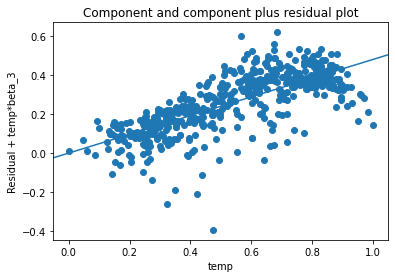

In [239]:

# Validating Linear Relationship
sm.graphics.plot_ccpr(lr11, 'temp')
plt.show()

## Step 7: Residual Analysis of the train data

In [241]:
y_train_pred = lr11.predict(X_train_sm)

Text(0.5, 0, 'Errors')

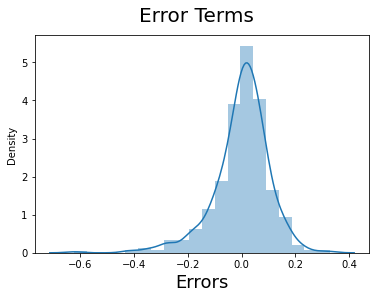

In [242]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [243]:
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])


In [245]:

# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [262]:
# Adding constant variable to test dataframe
X_test_m11 = sm.add_constant(X_test)

In [263]:
X_test_m11.head()

,const,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Good,weathersit_Monday
184,1.0,0.0,0.545455,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
535,1.0,1.0,0.454545,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
299,1.0,0.0,0.818182,0.0,1.0,0.511964,0.496145,0.837699,0.334206,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
221,1.0,0.0,0.636364,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
152,1.0,0.0,0.454545,0.0,1.0,0.817246,0.741471,0.314298,0.537414,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [260]:
arr

['weekday_Wednesday',
 'atemp',
 'weekday_Thursday',
 'weekday_Tuesday',
 'mnth',
 'weekday_Monday',
 'holiday',
 'holiday',
 'hum',
 'weathersit_Good']

In [264]:


X_test_m11 = X_test_m11.drop([
   'weekday_Wednesday',
 'atemp',
 'weekday_Thursday',
 'weekday_Tuesday',
 'mnth',
 'weekday_Monday',
 'holiday',
 'hum',
 'weathersit_Good'], axis = 1)


In [267]:
y_pred_11 = lr11.predict(X_test_m11)
y_pred_11

184    0.449050
535    0.898848
299    0.400513
221    0.571364
152    0.548018
         ...   
400    0.342935
702    0.718293
127    0.480315
640    0.804497
72     0.261620
Length: 219, dtype: float64

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

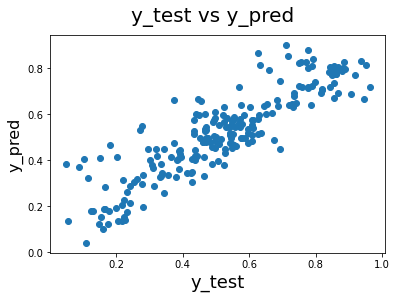

In [268]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_11)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [270]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_11)

0.7749478760079331

In [276]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_pred_11),2))

The R-Squared score of the model for the predicted values is 0.77


In [275]:
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 26 May 2021   Prob (F-statistic):          9.31e-160
Time:                        10:17:47   Log-Likelihood:                 431.14
No. Observations:                 510   AIC:                            -840.3
Df Residuals:                     499   BIC:                            -793.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1300      0.044      2.975      0.003       0.044       0.216
yr                    0.2397      0.009     25.546      0.000       0.221       0.258
workingday            0.0802      0.030      2.686      0.007       0.022       0.139
temp                  0.4807      0.037     12.838      0.000       0.407       0.554
windspeed            -0.1843      0.029     -6.460      0.000      -0.240      -0.128
season_spring        -0.0704      0.023     -3.066      0.002      -0.116      -0.025
season_summer         0.0441      0.015      2.854      0.004       0.014       0.074
season_winter         0.0711      0.019      3.834      0.000       0.035       0.108
weekday_Saturday      0.0910      0.032      2.883      0.004       0.029       0.153
weekday_Sunday        0.0381      0.032      1.200      0.231      -0.024       0.100
weathersit_Monday    -0.0652      0.010     -6.593      0.000      -0.085      -0.046
==============================================================================
Omnibus:                      127.739   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.068
Skew:                          -1.132   Prob(JB):                     2.04e-95
Kurtosis:                       6.923   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the equation of our best fitted line is:

$ price = 0.2397  \times  yr + 0.0802  \times  workingday + 0.4807 \times temp -0.1843 \times windspeed	 -0.0704 \times season_spring + 0.0441 \times season_summer + 0.0711 \times season_winter + 0.0910 \times weekday_Saturday + 0.0381 \times weekday_Sunday -0.0652 \times weathersit_Monday $